# Análise de sobrevivência piscinas municipais

## Analisar

Variáveis:

- Genero	Sexo - 1 para Masculino, 0 para Feminino
- Inicio	Data de inicio da inscrição
- Termino	Data de termino da inscrição
- Dtultvisita	Data da ultima visita as instalações obtida pela utilização do cartão no controlo de acessos
- Diassemfrequencia	Nº de dias em que não vinha às instalações até terminar a inscrição ou até 31/Outubro/2017 se a inscrição ainda não tinha terminado nessa data
- Mesesinscricao	Nº de meses da inscrição, ou seja, diferença de meses entre o inicio e o termino
- Volnegocios	Total pago pelo utente no período da sua inscrição
- Freqmedia	Freqmedia obtida pelo nº de frequencias a dividir pelo nº de semanas da sua inscrição, subtraido dos períodos de encerramento (mês de Agosto) quando a inscrição tem mais de 1 época
- natividades	Contagem dos 1 dos campos anteriores (linha 13 a 22)
- nfrequencias	Nº de visitas ao clube durante a sua inscrição
- freqcontratada	Nº de frequências por semana que o utente tinha contratada no ultimo período da sua inscrição (7 = livre trânsito)
- nrenovacoes	Nº de renovações que o utente fez durante a sua inscrição - ATENÇÃO: esta instalação fecha no mês de Agosto, pelo que os Utentes têm de renovar a inscrição para o proximo ano letivo
- nreferencias	Nº de pessoas associadas (familiares, amigos, etc.) também registados como utentes
- classe_desistencia	1 para desistente, 0 para utente ativo


1/TRUE = dead i.e. abandonou
0/FALSE = alive i.e. não abandonou


In [1]:
from IPython.display import HTML

In [2]:
import pandas as pd
dt = pd.read_excel('../dados/dadosPiscinaSetubal.xlsx',index_col=0)

In [3]:
dt.shape

(8295, 27)

## Vamos selecionar os nadadores

In [4]:
dt = dt.loc[dt.atividade_aquaticas == 1]

In [5]:
dt.columns

Index(['datanasc', 'idade', 'genero', 'inicio', 'termino', 'dtultvisita',
       'diassemfrequencia', 'mesesinscricao', 'volnegocios', 'freqmedia',
       'utilizacao_livre', 'atividade_atletismo', 'atividade_aquaticas',
       'atividade_fitness', 'atividade_danca', 'atividade_coletivos',
       'atividade_raquete', 'atividade_combate', 'atividade_especiais',
       'atividade_natureza', 'atividade_outra', 'natividades', 'nfrequencias',
       'freqcontratadasemanal', 'nrenovacoes', 'nreferencias',
       'classe_desistencia'],
      dtype='object')

In [6]:
dt.shape

(6749, 27)

## Vamos calcular uma variavel mes

In [7]:
dt['mes']=dt['inicio'].str.extract('-(\d\d)', expand=True)
dt['mes']=pd.to_numeric(dt['mes'])

In [8]:
dt[['idade', 'genero','diassemfrequencia', 'mesesinscricao', 'volnegocios', 'freqmedia',
    'natividades', 'nfrequencias','freqcontratadasemanal', 'nrenovacoes', 'nreferencias','mes','classe_desistencia']].describe()

,idade,genero,diassemfrequencia,mesesinscricao,volnegocios,freqmedia,natividades,nfrequencias,freqcontratadasemanal,nrenovacoes,nreferencias,mes,classe_desistencia
count,6749.000000,6749.000000,6749.000000,6749.000000,6749.000000,6749.000000,6749.000000,6749.000000,6747.000000,6749.000000,6749.000000,6749.000000,6749.000000
mean,18.686176,0.480960,48.751371,13.300933,161.740485,0.599911,1.074826,29.819825,2.072032,1.038524,0.304490,7.251741,0.577715
std,19.362335,0.499674,73.448122,10.915080,158.559194,0.423833,0.272536,35.389707,1.823724,1.069460,0.553224,3.172694,0.493960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,5.000000,0.000000,5.000000,4.000000,48.270000,0.300000,1.000000,6.000000,1.000000,0.000000,0.000000,4.000000,0.000000
50%,10.000000,0.000000,31.000000,10.000000,107.100000,0.500000,1.000000,17.000000,1.000000,1.000000,0.000000,9.000000,1.000000
75%,32.000000,1.000000,62.000000,20.000000,219.040000,0.800000,1.000000,40.000000,2.000000,2.000000,1.000000,9.000000,1.000000
max,117.000000,1.000000,1073.000000,47.000000,1293.000000,3.940000,3.000000,323.000000,7.000000,4.000000,5.000000,12.000000,1.000000


In [9]:
dt.loc[dt.idade > 100]

,datanasc,idade,genero,inicio,termino,dtultvisita,diassemfrequencia,mesesinscricao,volnegocios,freqmedia,...,atividade_especiais,atividade_natureza,atividade_outra,natividades,nfrequencias,freqcontratadasemanal,nrenovacoes,nreferencias,classe_desistencia,mes
Id,,,,,,,,,,,,,,,,,,,,,
606772EC-63D9-42DD-927E-62787063394F,1901-01-01 12:00:00.000,114,1,2015-10-05 13:33:03.590,2015-12-12 00:00:00.000,2015-10-17 09:40:11.523,56,2,20.82,0.10,...,0,0,0,1,1,1.0,0,1,1,10
6C621D70-41E6-4B8B-91A1-3ECEA63E726F,1900-01-01 00:00:00.000,117,1,2016-09-05 18:08:34.453,2017-07-31 00:00:00.000,2016-12-17 10:27:22.317,226,11,59.60,0.23,...,0,0,0,1,11,1.0,0,0,1,9


In [10]:
# Retirar estes
dt = dt.loc[dt.idade < 100 ]

In [11]:
dt['genero'].value_counts()

0    3503
1    3244
Name: genero, dtype: int64

In [12]:
colunasScale=['idade','diassemfrequencia','mesesinscricao','volnegocios','freqmedia','natividades','nfrequencias',
              'freqcontratadasemana','nrenovacoes','nreferencias']
#Transformar classe desistencia em booleana
dt['classe_desistencia']=dt['classe_desistencia'].map({True:1, False:0})

In [13]:
# Femininos
dt.loc[dt.genero==0].describe()

,idade,genero,diassemfrequencia,mesesinscricao,volnegocios,freqmedia,utilizacao_livre,atividade_atletismo,atividade_aquaticas,atividade_fitness,...,atividade_especiais,atividade_natureza,atividade_outra,natividades,nfrequencias,freqcontratadasemanal,nrenovacoes,nreferencias,classe_desistencia,mes
count,3503.000000,3503.0,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.0,3503.000000,...,3503.000000,3503.0,3503.0,3503.000000,3503.000000,3502.000000,3503.000000,3503.000000,3503.000000,3503.000000
mean,22.123608,0.0,48.190694,12.813017,158.810351,0.597160,0.081073,0.001713,1.0,0.074793,...,0.017414,0.0,0.0,1.096489,28.604910,2.065106,1.017414,0.275478,0.586640,7.102769
std,20.899213,0.0,72.794899,10.608964,158.915403,0.416069,0.272987,0.041357,0.0,0.263095,...,0.130825,0.0,0.0,0.307616,34.511576,1.795545,1.064716,0.531467,0.492507,3.253474
min,0.000000,0.0,0.000000,0.000000,2.600000,0.020000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,0.0,5.000000,4.000000,48.055000,0.300000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.0,0.0,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,4.000000
50%,12.000000,0.0,31.000000,9.000000,103.330000,0.500000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.0,0.0,1.000000,16.000000,2.000000,1.000000,0.000000,1.000000,9.000000
75%,39.000000,0.0,62.000000,19.000000,209.210000,0.790000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.0,0.0,1.000000,38.000000,2.000000,2.000000,0.000000,1.000000,9.000000
max,88.000000,0.0,1073.000000,47.000000,1114.550000,3.940000,1.000000,1.000000,1.0,1.000000,...,1.000000,0.0,0.0,3.000000,297.000000,7.000000,4.000000,5.000000,1.000000,12.000000


In [14]:
dt.loc[dt.genero==1].describe()

,idade,genero,diassemfrequencia,mesesinscricao,volnegocios,freqmedia,utilizacao_livre,atividade_atletismo,atividade_aquaticas,atividade_fitness,...,atividade_especiais,atividade_natureza,atividade_outra,natividades,nfrequencias,freqcontratadasemanal,nrenovacoes,nreferencias,classe_desistencia,mes
count,3244.000000,3244.0,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.000000,3244.0,3244.000000,...,3244.000000,3244.0,3244.0,3244.00000,3244.000000,3243.000000,3244.000000,3244.000000,3244.000000,3244.000000
mean,14.914612,1.0,49.299938,13.831998,164.979485,0.603150,0.087546,0.002466,1.0,0.024044,...,0.006473,0.0,0.0,1.05148,31.146424,2.080173,1.061961,0.335697,0.567818,7.411221
std,16.602826,0.0,74.110940,11.215346,158.155138,0.432094,0.282677,0.049606,0.0,0.153211,...,0.080210,0.0,0.0,0.22652,36.278845,1.854281,1.074262,0.574251,0.495456,3.076045
min,0.000000,1.0,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.0,0.0,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,1.0,3.000000,5.000000,48.520000,0.300000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.0,0.0,1.00000,7.000000,1.000000,0.000000,0.000000,0.000000,5.000000
50%,8.000000,1.0,30.000000,10.000000,111.600000,0.510000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.0,0.0,1.00000,18.000000,1.000000,1.000000,0.000000,1.000000,9.000000
75%,16.000000,1.0,63.000000,21.000000,227.182500,0.810000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.0,0.0,1.00000,43.250000,2.000000,2.000000,1.000000,1.000000,9.000000
max,86.000000,1.0,925.000000,47.000000,1293.000000,3.730000,1.000000,1.000000,1.0,1.000000,...,1.000000,0.0,0.0,3.00000,323.000000,7.000000,4.000000,4.000000,1.000000,12.000000


## Descritivas

A média do valor mensal

In [21]:
dt.shape[0]

6747

In [15]:
dt.volnegocios.sum()

1091506.1099999999

In [22]:
(dt.volnegocios.sum()/dt.shape[0])/12

13.481375796650362

In [24]:
(dt.diassemfrequencia.sum()/dt.shape[0])/12

4.060335457734301

In [27]:
dt.nfrequencias.sum()/dt.shape[0]/12

2.4855738352848182

## Survival Analysis

In [28]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
T = dt['mesesinscricao']
C = dt['classe_desistencia']

In [29]:
kmf.fit(T,C,label="Swimmers")

<lifelines.KaplanMeierFitter: fitted with 6747 observations, 2850 censored>

In [30]:
kmf.event_table.reset_index()

,event_at,removed,observed,censored,entrance,at_risk
0,0,5,5,0,6747,6747
1,1,127,52,75,0,6742
2,2,758,241,517,0,6615
3,3,439,433,6,0,5857
4,4,372,340,32,0,5418
5,5,346,299,47,0,5046
6,6,319,274,45,0,4700
7,7,406,356,50,0,4381
8,8,268,198,70,0,3975
9,9,240,183,57,0,3707


In [31]:
kmf.conditional_time_to_event_

,Swimmers - Conditional time remaining to event
timeline,
0.0,14.0
1.0,14.0
2.0,13.0
3.0,15.0
4.0,16.0
5.0,17.0
6.0,17.0
7.0,20.0
8.0,20.0


In [32]:
kmf.survival_function_.round(decimals=2)

,Swimmers
timeline,
0.0,1.00
1.0,0.99
2.0,0.96
3.0,0.88
4.0,0.83
5.0,0.78
6.0,0.73
7.0,0.67
8.0,0.64


## Juntar tudo

In [33]:
pd.concat([kmf.event_table.reset_index(), kmf.conditional_time_to_event_.reset_index(),
           kmf.survival_function_.reset_index()],axis=1).to_excel('dados2.xlsx')

In [34]:
kmf.median_

14.0

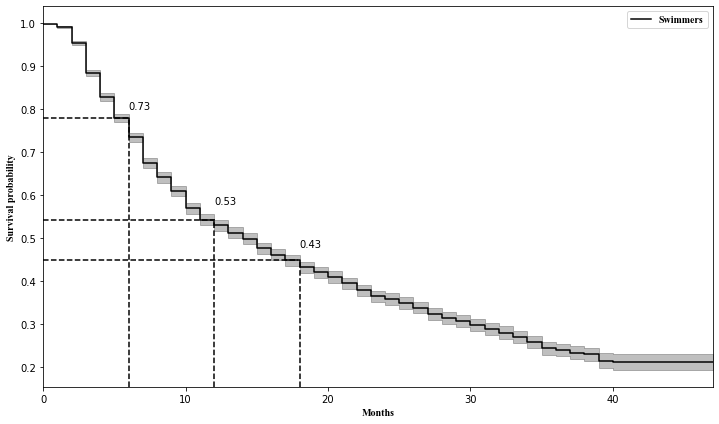

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

plt.rcParams['figure.figsize'] = [12, 7]

fontL = font_manager.FontProperties(family='Times New Roman',weight=None,style='normal', size=10)

fontAxis = {'family': 'Times New Roman',
#            'color':  'darkred',
#            'weight': 'normal',
            'size': 10,}

ax = kmf.plot(c='black')
ax.legend(prop=fontL)
ax.set_xlabel('Months',fontdict=fontAxis,fontsize=10)
ax.set_ylabel('Survival probability',fontdict=fontAxis,fontsize=10)

ax.axvline(x=6,ymax=0.70,linestyle='--',color='black');ax.axhline(y=0.78,xmax=0.129,linestyle='--',color='black')
# 6.0 	0.73
ax.annotate("0.73",xy=(6, 0.7), xytext=(6, 0.8))

ax.axvline(x=12,ymax=0.44,linestyle='--',color='black');ax.axhline(y=0.542,xmax=0.254,linestyle='--',color='black')
# 12.0 	0.53
ax.annotate("0.53",xy=(12, 0.44), xytext=(12, 0.58))

ax.axvline(x=18,ymax=0.33,linestyle='--',color='black');ax.axhline(y=0.45,xmax=0.38,linestyle='--',color='black')
# 18.0 	0.43
ax.annotate("0.43",xy=(18, 0.38), xytext=(18, 0.48))

plt.show()
plt.savefig('../submissao/figure1.png', dpi=90)
plt.close()

Text(0, 0.5, 'clientes')

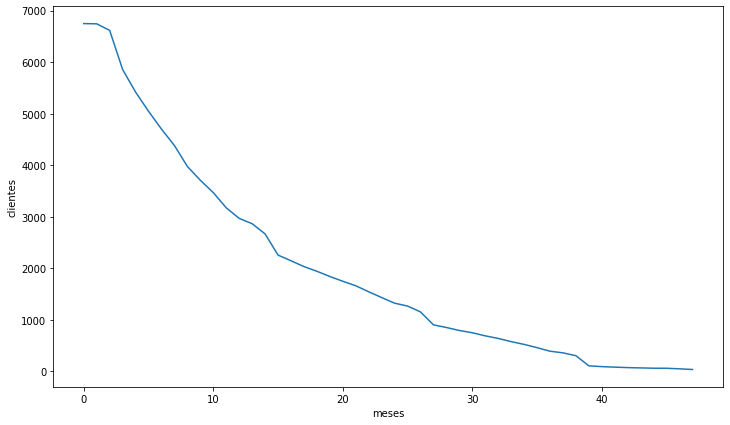

In [25]:
abandono=kmf.event_table.reset_index()

plt.rcParams['figure.figsize'] = [12, 7]
plt.plot(abandono.event_at, abandono.at_risk)
 
plt.xlabel('meses')
plt.ylabel('clientes')
#plt.xlabel()

6747


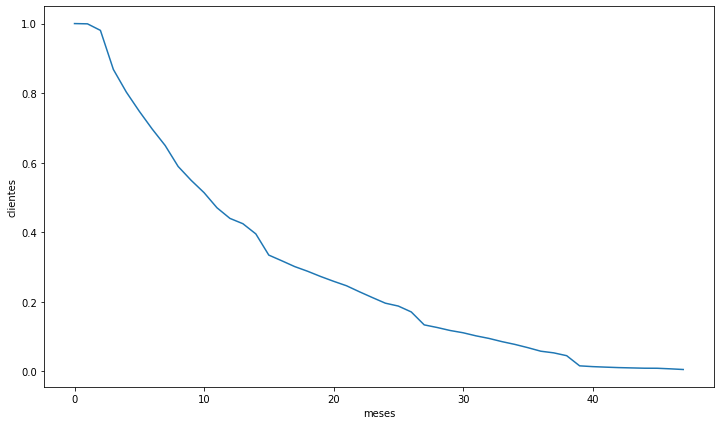

In [26]:
abandono['percentagemClientes']= 0.0
anterior = abandono.at_risk[0:1]
anterior = anterior[0]
print(anterior)

for index, row in abandono.iterrows():
    abandono.at[index, 'percentagemClientes'] = row.at_risk/anterior    

plt.rcParams['figure.figsize'] = [12, 7]
plt.xlabel('meses')
plt.ylabel('clientes')
plt.plot(abandono.event_at, abandono.percentagemClientes)
plt.show()

In [27]:
abandono

,event_at,removed,observed,censored,entrance,at_risk,percentagemClientes
0,0,5,5,0,6747,6747,1.000000
1,1,127,52,75,0,6742,0.999259
2,2,758,241,517,0,6615,0.980436
3,3,439,433,6,0,5857,0.868090
4,4,372,340,32,0,5418,0.803024
5,5,346,299,47,0,5046,0.747888
6,6,319,274,45,0,4700,0.696606
7,7,406,356,50,0,4381,0.649326
8,8,268,198,70,0,3975,0.589151
9,9,240,183,57,0,3707,0.549429


A probabilidade de sobreviver mais de 10 meses é de 50%. A probabilidade de sobreviver 20 meses é de 25%.

## Por género

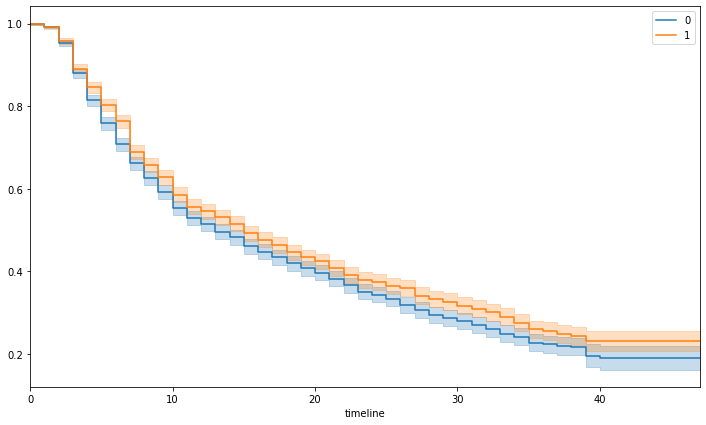

In [28]:
ax = plt.subplot(111)
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

for gen in dt['genero'].unique():
    ix = dt['genero'] == gen
    kmf.fit(T.loc[ix], C.loc[ix], label=str(gen))
    ax = kmf.plot(ax=ax)

1 - Masculino / 0 - Feminino

## Quantos meses temos metade das pessoas a abandonar

In [29]:
kmf.median_

15.0

## S(t) == P(T>t) probabilidade de viver mais do que seis meses

In [31]:
kmf.predict(6.0)

0.7637997509868095

## Verificar o tempo de sobrevivência condicionado
Tempo de vida condicionado ao tempo de sobrevivência t. Se uma pessoa está nas piscinas à 1 mês o tempo esperado de ficar é de 10. Se ficar 9 meses o tempo esperado de ficar é de 10 meses.

In [30]:
#kmf._conditional_time_to_event_()

In [32]:
dt.corr().round(decimals=imals=2)

,idade,genero,diassemfrequencia,mesesinscricao,volnegocios,freqmedia,utilizacao_livre,atividade_atletismo,atividade_aquaticas,atividade_fitness,...,atividade_especiais,atividade_natureza,atividade_outra,natividades,nfrequencias,freqcontratadasemanal,nrenovacoes,nreferencias,classe_desistencia,mes
idade,1.00,-0.19,0.10,-0.00,0.10,0.11,0.20,-0.01,NaN,0.15,...,0.19,NaN,NaN,0.18,0.08,0.19,-0.02,0.03,0.11,-0.03
genero,-0.19,1.00,0.01,0.05,0.02,0.01,0.01,0.01,NaN,-0.12,...,-0.05,NaN,NaN,-0.08,0.04,0.00,0.02,0.05,-0.02,0.05
diassemfrequencia,0.10,0.01,1.00,-0.01,-0.14,-0.34,0.14,0.01,NaN,0.02,...,0.01,NaN,NaN,0.02,-0.19,0.12,-0.02,0.05,0.34,0.01
mesesinscricao,-0.00,0.05,-0.01,1.00,0.75,0.01,0.23,0.06,NaN,0.17,...,0.09,NaN,NaN,0.21,0.68,0.12,0.88,0.29,-0.34,0.04
volnegocios,0.10,0.02,-0.14,0.75,1.00,0.31,0.05,0.01,NaN,0.19,...,0.09,NaN,NaN,0.22,0.87,0.06,0.66,0.18,-0.27,0.06
freqmedia,0.11,0.01,-0.34,0.01,0.31,1.00,-0.01,-0.02,NaN,0.09,...,0.06,NaN,NaN,0.11,0.54,0.12,0.05,-0.08,-0.29,0.00
utilizacao_livre,0.20,0.01,0.14,0.23,0.05,-0.01,1.00,-0.00,NaN,0.09,...,0.02,NaN,NaN,0.08,0.07,0.52,0.14,0.05,-0.00,-0.04
atividade_atletismo,-0.01,0.01,0.01,0.06,0.01,-0.02,-0.00,1.00,NaN,0.00,...,-0.01,NaN,NaN,0.17,0.02,0.07,0.06,-0.00,-0.01,-0.00
atividade_aquaticas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
atividade_fitness,0.15,-0.12,0.02,0.17,0.19,0.09,0.09,0.00,NaN,1.00,...,0.03,NaN,NaN,0.82,0.17,0.27,0.15,0.03,-0.04,-0.01


In [33]:
dt.dropna(inplace=True)

In [34]:
T = dt['mesesinscricao']
C = dt['classe_desistencia']

In [35]:
dt.columns

Index(['datanasc', 'idade', 'genero', 'inicio', 'termino', 'dtultvisita',
       'diassemfrequencia', 'mesesinscricao', 'volnegocios', 'freqmedia',
       'utilizacao_livre', 'atividade_atletismo', 'atividade_aquaticas',
       'atividade_fitness', 'atividade_danca', 'atividade_coletivos',
       'atividade_raquete', 'atividade_combate', 'atividade_especiais',
       'atividade_natureza', 'atividade_outra', 'natividades', 'nfrequencias',
       'freqcontratadasemanal', 'nrenovacoes', 'nreferencias',
       'classe_desistencia', 'mes'],
      dtype='object')

O Cox Fitter deu erro atividade danca e atividade natureza removi estas variaveis

In [36]:
nomes_features= ['idade', 'genero', 'diassemfrequencia', 'mesesinscricao', 'volnegocios', 'freqmedia',
                  'natividades', 'nfrequencias', 'freqcontratadasemanal', 
                 'nrenovacoes', 'nreferencias', 'classe_desistencia','mes']
dtNadadores = dt[nomes_features].copy()

from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(dtNadadores,duration_col='mesesinscricao',event_col='classe_desistencia')

<lifelines.CoxPHFitter: fitted with 6745 observations, 2850 censored>

In [37]:
%store dtNadadores

Stored 'dtNadadores' (DataFrame)


In [38]:
dtNadadores.columns

Index(['idade', 'genero', 'diassemfrequencia', 'mesesinscricao', 'volnegocios',
       'freqmedia', 'natividades', 'nfrequencias', 'freqcontratadasemanal',
       'nrenovacoes', 'nreferencias', 'classe_desistencia', 'mes'],
      dtype='object')

## Não podem existir mais do que duas variáveis com correlação = 1 ou -1

In [38]:
#dt.corr()

In [39]:
cph.check_assumptions(dtNadadores)

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.

<lifelines.StatisticalResult>
         test_name = proportional_hazard_test
 null_distribution = chi squared
degrees_of_freedom = 1

---
                            test_statistic      p  -log2(p)
diassemfrequencia     km            137.31 <0.005    102.93
                      rank          143.40 <0.005    107.36
freqcontratadasemanal km              4.13   0.04      4.56
                      

In [40]:
nomes_features= ['idade', 'genero', 'mesesinscricao', 'freqmedia', 'natividades', 'freqcontratadasemanal', 'classe_desistencia']

nomes_features= ['idade', 'genero', 'diassemfrequencia', 'mesesinscricao', 'volnegocios', 'freqmedia','natividades', 'nfrequencias', 'freqcontratadasemanal', 
                 'nrenovacoes', 'nreferencias', 'classe_desistencia','mes']

dtNad = dtNadadores[nomes_features].copy()

from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(dtNad,duration_col='mesesinscricao',event_col='classe_desistencia')

<lifelines.CoxPHFitter: fitted with 6745 observations, 2850 censored>

In [41]:
cph.check_assumptions(dtNad)

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.

<lifelines.StatisticalResult>
         test_name = proportional_hazard_test
 null_distribution = chi squared
degrees_of_freedom = 1

---
                            test_statistic      p  -log2(p)
diassemfrequencia     km            137.31 <0.005    102.93
                      rank          143.40 <0.005    107.36
freqcontratadasemanal km              4.13   0.04      4.56
                      

In [42]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 6745 observations, 2850 censored>
      duration col = 'mesesinscricao'
         event col = 'classe_desistencia'
number of subjects = 6745
  number of events = 3895
    log-likelihood = -27650.91
  time fit was run = 2019-10-12 21:12:56 UTC

---
                       coef exp(coef)  se(coef)      z      p  -log2(p)  lower 0.95  upper 0.95
idade                  0.01      1.01      0.00   6.40 <0.005     32.62        0.00        0.01
genero                -0.04      0.96      0.03  -1.12   0.26      1.94       -0.10        0.03
diassemfrequencia      0.00      1.00      0.00   5.57 <0.005     25.22        0.00        0.00
volnegocios           -0.00      1.00      0.00  -4.07 <0.005     14.37       -0.00       -0.00
freqmedia              0.59      1.81      0.06  10.66 <0.005     85.77        0.49        0.70
natividades           -0.04      0.96      0.07  -0.56   0.58      0.79       -0.18        0.10
nfrequencias          -0.02      0.98      0.

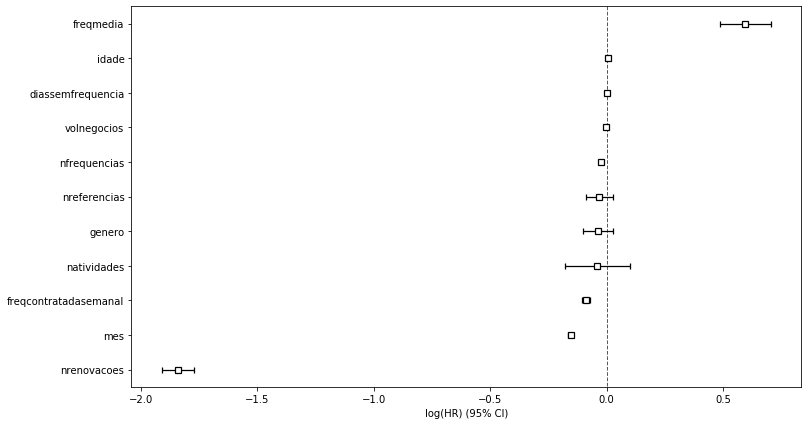

In [43]:
cph.plot()

In [44]:
nomes_features= ['idade', 'genero', 'mesesinscricao', 'freqmedia','natividades', 'freqcontratadasemanal','nreferencias', 'classe_desistencia']


In [45]:
nomes_features

['idade',
 'genero',
 'mesesinscricao',
 'freqmedia',
 'natividades',
 'freqcontratadasemanal',
 'nreferencias',
 'classe_desistencia']

In [46]:
#cph.check_assumptions(dtNadadores,p_value_threshold=0.05,show_plots=True)
cph.check_assumptions(dtNadadores,p_value_threshold=0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.

<lifelines.StatisticalResult>
         test_name = proportional_hazard_test
 null_distribution = chi squared
degrees_of_freedom = 1

---
                            test_statistic      p  -log2(p)
diassemfrequencia     km            137.31 <0.005    102.93
                      rank          143.40 <0.005    107.36
freqcontratadasemanal km              4.13   0.04      4.56
                      

In [47]:
# Modify functional form:
dtNadadores2 = dtNadadores.copy()
dtNadadores2['idade'] = dtNadadores2['idade'] - dtNadadores2['idade'].mean()
dtNadadores2['diassemfrequencia'] = dtNadadores2['diassemfrequencia'] - dtNadadores2['diassemfrequencia'].mean()**3
dtNadadores2['volnegocios'] = dtNadadores2['volnegocios'] - dtNadadores2['volnegocios'].mean()**2
dtNadadores2['nrenovacoes'] = dtNadadores2['nrenovacoes'] - dtNadadores2['nrenovacoes'].mean()**3
dtNadadores2['nfrequencias'] = dtNadadores2['nfrequencias'] - dtNadadores2['nfrequencias'].mean()**2
dtNadadores2['nreferencias'] = dtNadadores2['nreferencias'] - dtNadadores2['nreferencias'].mean()**2
#volnegocios

nomes_features2= ['idade','genero', 'diassemfrequencia', 'mesesinscricao', 'volnegocios', 'freqmedia',
                  'natividades', 'nfrequencias', 'freqcontratadasemanal', 
                 'nrenovacoes', 'nreferencias', 'classe_desistencia','mes']
dtNadadores2 = dtNadadores2[nomes_features2]

from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(dtNadadores2,duration_col='mesesinscricao',event_col='classe_desistencia')

<lifelines.CoxPHFitter: fitted with 6745 observations, 2850 censored>

## Ajustamos a "functional form" só corrigimos idade

In [48]:
#cph.check_assumptions(dtNadadores2,show_plots=True)
cph.check_assumptions(dtNadadores2)

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.

<lifelines.StatisticalResult>
         test_name = proportional_hazard_test
 null_distribution = chi squared
degrees_of_freedom = 1

---
                            test_statistic      p  -log2(p)
diassemfrequencia     km            137.31 <0.005    102.93
                      rank          143.40 <0.005    107.36
freqcontratadasemanal km              4.13   0.04      4.56
                      

In [49]:
# Modify functional form:
dtNadadores2 = dtNadadores.copy()
dtNadadores2['idade'] = dtNadadores2['idade'] - dtNadadores2['idade'].mean()
dtNadadores2['diassemfrequencia'] = dtNadadores2['diassemfrequencia'] - dtNadadores2['diassemfrequencia'].mean()**3
dtNadadores2['volnegocios'] = dtNadadores2['volnegocios'] - dtNadadores2['volnegocios'].mean()**2
dtNadadores2['nrenovacoes'] = dtNadadores2['nrenovacoes'] - dtNadadores2['nrenovacoes'].mean()**3
dtNadadores2['nfrequencias'] = dtNadadores2['nfrequencias'] - dtNadadores2['nfrequencias'].mean()**2
dtNadadores2['nreferencias'] = dtNadadores2['nreferencias'] - dtNadadores2['nreferencias'].mean()**2
dtNadadores2['mes'] = dtNadadores2['mes'] - dtNadadores2['mes'].mean()
#volnegocios

nomes_features2= ['idade','genero', 'diassemfrequencia', 'mesesinscricao', 'volnegocios', 'freqmedia',
                  'natividades', 'nfrequencias', 'freqcontratadasemanal', 
                 'nrenovacoes', 'nreferencias', 'classe_desistencia','mes']
dtNadadores2 = dtNadadores2[nomes_features2]

from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(dtNadadores2,duration_col='mesesinscricao',event_col='classe_desistencia')

<lifelines.CoxPHFitter: fitted with 6745 observations, 2850 censored>

In [50]:
cph.check_assumptions(dtNadadores2)

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.

<lifelines.StatisticalResult>
         test_name = proportional_hazard_test
 null_distribution = chi squared
degrees_of_freedom = 1

---
                            test_statistic      p  -log2(p)
diassemfrequencia     km            137.31 <0.005    102.93
                      rank          143.40 <0.005    107.36
freqcontratadasemanal km              4.13   0.04      4.56
                      

## Ajustar valores variáveis

In [50]:
nomes_features= ['idade', 'genero', 'diassemfrequencia', 'mesesinscricao', 'volnegocios', 'freqmedia',
                  'natividades', 'nfrequencias', 'freqcontratadasemanal', 
                 'nrenovacoes', 'nreferencias', 'classe_desistencia','mes']
dtNadadores = dt[nomes_features].copy()

### Ajustar dias sem frequência

In [51]:
dtNadadores.diassemfrequencia.describe()

count    6745.000000
mean       48.684507
std        73.357987
min         0.000000
25%         5.000000
50%        31.000000
75%        62.000000
max      1073.000000
Name: diassemfrequencia, dtype: float64

In [52]:
'''                         test_statistic      p  -log2(p)
diassemfrequencia     km            137.31 <0.005    102.93
mes                   km            111.56 <0.005     84.21
nfrequencias          km             64.54 <0.005     49.91
nrenovacoes           km             28.76 <0.005     23.54
volnegocios           km            139.52 <0.005    104.54
'''

'                         test_statistic      p  -log2(p)\ndiassemfrequencia     km            137.31 <0.005    102.93\nmes                   km            111.56 <0.005     84.21\nnfrequencias          km             64.54 <0.005     49.91\nnrenovacoes           km             28.76 <0.005     23.54\nvolnegocios           km            139.52 <0.005    104.54\n'

In [53]:
dtNadadores['diassemfrequencia2']=''
[5,31,62]

for index, cliente in dtNadadores.iterrows():
    #se a variável tiver o valor 1 colocar na nova variável a descrição da atividade
    if cliente['diassemfrequencia']<=5:
        dtNadadores.at[index,'diassemfrequencia2']='ate 5'
    elif (cliente['diassemfrequencia']>5) & (cliente['diassemfrequencia']<=31):
        dtNadadores.at[index,'diassemfrequencia2']='5 a 31'
    elif (cliente['diassemfrequencia']>31) & (cliente['diassemfrequencia']<=62):
        dtNadadores.at[index,'diassemfrequencia2']='31 a 62'
    elif (cliente['diassemfrequencia']>62):
        dtNadadores.at[index,'diassemfrequencia2']='mais 62'

In [54]:
dtNadadores.diassemfrequencia2.value_counts()

ate 5      1807
31 a 62    1675
mais 62    1675
5 a 31     1588
Name: diassemfrequencia2, dtype: int64

In [55]:
dtNadadores=pd.get_dummies(dtNadadores,columns=['diassemfrequencia2'],drop_first=True)

In [56]:
dtNadadores.columns

Index(['idade', 'genero', 'diassemfrequencia', 'mesesinscricao', 'volnegocios',
       'freqmedia', 'natividades', 'nfrequencias', 'freqcontratadasemanal',
       'nrenovacoes', 'nreferencias', 'classe_desistencia', 'mes',
       'diassemfrequencia2_5 a 31', 'diassemfrequencia2_ate 5',
       'diassemfrequencia2_mais 62'],
      dtype='object')

In [57]:
nomes_features= ['idade', 'genero', 'mesesinscricao', 'freqmedia','natividades', 'freqcontratadasemanal', 
                 'diassemfrequencia2_5 a 31', 'diassemfrequencia2_ate 5','diassemfrequencia2_mais 62',
                 'nreferencias', 'classe_desistencia']

In [58]:
cph = CoxPHFitter()
cph.fit(dtNadadores[nomes_features],duration_col='mesesinscricao',event_col='classe_desistencia')
cph.check_assumptions(dtNadadores[nomes_features],p_value_threshold=0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.

<lifelines.StatisticalResult>
         test_name = proportional_hazard_test
 null_distribution = chi squared
degrees_of_freedom = 1

---
                                 test_statistic      p  -log2(p)
diassemfrequencia2_5 a 31  km             78.91 <0.005     60.41
                           rank           76.58 <0.005     58.72
diassemfrequencia2_ate 5   km             46.47 <0.005     36.65
  

### Ajustar os meses para trimestre

In [59]:
dtNadadores['trimestre'] = 0

In [60]:
dtNadadores.loc[dtNadadores['mes'].isin([1,2,3]),'trimestre']=1
dtNadadores.loc[dtNadadores['mes'].isin([4,5,6]),'trimestre']=2
dtNadadores.loc[dtNadadores['mes'].isin([7,8,9]),'trimestre']=3
dtNadadores.loc[dtNadadores['mes'].isin([10,11,12]),'trimestre']=4

In [61]:
nomes_features= ['idade', 'genero', 'mesesinscricao', 'freqmedia','natividades', 'freqcontratadasemanal', 
                 'trimestre','nreferencias', 'classe_desistencia']

In [62]:
dtNadadores['trimestre'].describe()

count    6745.000000
mean        2.657969
std         1.020107
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: trimestre, dtype: float64

In [63]:
cph = CoxPHFitter()
cph.fit(dtNadadores[nomes_features],duration_col='mesesinscricao',event_col='classe_desistencia')
cph.check_assumptions(dtNadadores[nomes_features],p_value_threshold=0.0500,advice=False)

<lifelines.StatisticalResult>
         test_name = proportional_hazard_test
 null_distribution = chi squared
degrees_of_freedom = 1

---
                            test_statistic      p  -log2(p)
freqcontratadasemanal km             17.93 <0.005     15.41
                      rank           17.38 <0.005     14.99
freqmedia             km             12.77 <0.005     11.47
                      rank           17.87 <0.005     15.37
genero                km              0.12   0.73      0.45
                      rank            0.08   0.78      0.36
idade                 km              6.00   0.01      6.13
                      rank            6.57   0.01      6.59
natividades           km             26.76 <0.005     22.05
                      rank           22.46 <0.005     18.83
nreferencias          km             42.11 <0.005     33.43
                      rank           41.82 <0.005     33.22
trimestre             km              3.15   0.08      3.72
                      r

**Continua a falhar o proportional hazard de schoenfeld** Considerando que o valor é 0.0531 vamos assumir superior a 0.05

### Ajustar o numero de entradas para quartis

In [64]:
dtNadadores.nfrequencias.describe()

count    6745.000000
mean       29.835434
std        35.394236
min         1.000000
25%         6.000000
50%        17.000000
75%        40.000000
max       323.000000
Name: nfrequencias, dtype: float64

In [65]:
dtNadadores['escFreq']=0
for index, cliente in dtNadadores.iterrows():
    #se a variável tiver o valor 1 colocar na nova variável a descrição da atividade
    if cliente['nfrequencias'] <= 6:
        dtNadadores.at[index,'escFreq']=0
    elif (cliente['nfrequencias'] > 6) & (cliente['nfrequencias'] <= 17):
        dtNadadores.at[index,'escFreq']=1
    elif (cliente['nfrequencias'] > 17) & (cliente['nfrequencias'] <= 40):
        dtNadadores.at[index,'escFreq']=2
    elif (cliente['nfrequencias'] > 40):
        dtNadadores.at[index,'escFreq']=3
       
    #dtNadadores.at[index,'escFreq']=np.around(cliente['nfrequencias'],decimals=1)

In [66]:
dtNadadores.escFreq.value_counts()

1    1760
0    1720
3    1674
2    1591
Name: escFreq, dtype: int64

In [67]:
dtNadadores=pd.get_dummies(dtNadadores,columns=['escFreq'],drop_first=True)

In [68]:
dtNadadores.columns

Index(['idade', 'genero', 'diassemfrequencia', 'mesesinscricao', 'volnegocios',
       'freqmedia', 'natividades', 'nfrequencias', 'freqcontratadasemanal',
       'nrenovacoes', 'nreferencias', 'classe_desistencia', 'mes',
       'diassemfrequencia2_5 a 31', 'diassemfrequencia2_ate 5',
       'diassemfrequencia2_mais 62', 'trimestre', 'escFreq_1', 'escFreq_2',
       'escFreq_3'],
      dtype='object')

In [69]:
nomes_features= ['idade', 'genero', 'mesesinscricao', 'freqmedia','natividades', 'freqcontratadasemanal', 
                 'escFreq_1', 'escFreq_2', 'escFreq_3', 'nreferencias', 'classe_desistencia']

In [70]:
cph = CoxPHFitter()
cph.fit(dtNadadores[nomes_features],duration_col='mesesinscricao',event_col='classe_desistencia')
cph.check_assumptions(dtNadadores[nomes_features],p_value_threshold=0.05,advice=False)

<lifelines.StatisticalResult>
         test_name = proportional_hazard_test
 null_distribution = chi squared
degrees_of_freedom = 1

---
                            test_statistic      p  -log2(p)
escFreq_1             km            209.99 <0.005    155.67
                      rank          228.62 <0.005    169.16
escFreq_2             km            599.56 <0.005    437.43
                      rank          624.65 <0.005    455.56
escFreq_3             km            558.20 <0.005    407.55
                      rank          538.76 <0.005    393.50
freqcontratadasemanal km             25.04 <0.005     20.76
                      rank           21.79 <0.005     18.33
freqmedia             km            150.52 <0.005    112.53
                      rank          138.73 <0.005    103.97
genero                km              1.17   0.28      1.84
                      rank            1.09   0.30      1.75
idade                 km              0.31   0.58      0.79
                      r

**Continua a falhar o proportional hazard de schoenfeld**

### Ajustar o numero de renovacoes para quartis

In [71]:
dtNadadores.columns
dtNadadores.nrenovacoes.describe()

count    6745.000000
mean        1.038992
std         1.069552
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: nrenovacoes, dtype: float64

In [72]:
dtNadadores['esc_nrenovacoes']=0
for index, cliente in dtNadadores.iterrows():
    #se a variável tiver o valor 1 colocar na nova variável a descrição da atividade
    if cliente['nrenovacoes'] == 0:
        dtNadadores.at[index,'esc_nrenovacoes']=0
    elif (cliente['nrenovacoes'] > 0) & (cliente['nrenovacoes'] <= 1):
        dtNadadores.at[index,'esc_nrenovacoes']=1
    elif (cliente['nrenovacoes'] > 1) & (cliente['nrenovacoes'] <= 2):
        dtNadadores.at[index,'esc_nrenovacoes']=2
    elif (cliente['nrenovacoes'] > 2):
        dtNadadores.at[index,'esc_nrenovacoes']=3
       
    #dtNadadores.at[index,'esc_nrenovacoes']=np.around(cliente['nrenovacoes'],decimals=1)

In [73]:
dtNadadores.esc_nrenovacoes.value_counts()

0    2803
1    1752
2    1366
3     824
Name: esc_nrenovacoes, dtype: int64

In [74]:
dtNadadores=pd.get_dummies(dtNadadores,columns=['esc_nrenovacoes'],drop_first=True)

In [75]:
dtNadadores.columns

Index(['idade', 'genero', 'diassemfrequencia', 'mesesinscricao', 'volnegocios',
       'freqmedia', 'natividades', 'nfrequencias', 'freqcontratadasemanal',
       'nrenovacoes', 'nreferencias', 'classe_desistencia', 'mes',
       'diassemfrequencia2_5 a 31', 'diassemfrequencia2_ate 5',
       'diassemfrequencia2_mais 62', 'trimestre', 'escFreq_1', 'escFreq_2',
       'escFreq_3', 'esc_nrenovacoes_1', 'esc_nrenovacoes_2',
       'esc_nrenovacoes_3'],
      dtype='object')

In [76]:
nomes_features= ['idade', 'genero', 'mesesinscricao', 'freqmedia','natividades', 'freqcontratadasemanal', 'trimestre',
                 'esc_nrenovacoes_1', 'esc_nrenovacoes_2','esc_nrenovacoes_3', 'nreferencias', 'classe_desistencia']

In [77]:
cph = CoxPHFitter()
cph.fit(dtNadadores[nomes_features],duration_col='mesesinscricao',event_col='classe_desistencia')
cph.check_assumptions(dtNadadores[nomes_features],p_value_threshold=0.05,advice=False)

<lifelines.StatisticalResult>
         test_name = proportional_hazard_test
 null_distribution = chi squared
degrees_of_freedom = 1

---
                            test_statistic      p  -log2(p)
esc_nrenovacoes_1     km              0.53   0.47      1.10
                      rank            0.73   0.39      1.35
esc_nrenovacoes_2     km              3.58   0.06      4.10
                      rank            2.56   0.11      3.19
esc_nrenovacoes_3     km              0.49   0.48      1.05
                      rank            0.38   0.54      0.90
freqcontratadasemanal km              5.13   0.02      5.41
                      rank            4.95   0.03      5.26
freqmedia             km              0.60   0.44      1.19
                      rank            0.10   0.75      0.42
genero                km              1.42   0.23      2.10
                      rank            1.18   0.28      1.85
idade                 km              0.11   0.75      0.42
                      r

### Ajustar valor faturado para quartis

In [78]:
dtNadadores.columns
dtNadadores.volnegocios.describe()

count    6745.000000
mean      161.815483
std       158.575887
min         0.000000
25%        48.280000
50%       107.200000
75%       219.040000
max      1293.000000
Name: volnegocios, dtype: float64

In [79]:
dtNadadores['esc_volNeg']=0
for index, cliente in dtNadadores.iterrows():
    #se a variável tiver o valor 1 colocar na nova variável a descrição da atividade
    if cliente['volnegocios'] <= 48:
        dtNadadores.at[index,'esc_volNeg']=0
    elif (cliente['volnegocios'] > 48) & (cliente['volnegocios'] <= 107):
        dtNadadores.at[index,'esc_volNeg']=1
    elif (cliente['volnegocios'] > 107) & (cliente['volnegocios'] <= 219):
        dtNadadores.at[index,'esc_volNeg']=2
    elif (cliente['volnegocios'] > 219):
        dtNadadores.at[index,'esc_volNeg']=3
       
    #dtNadadores.at[index,'esc_volNeg']=np.around(cliente['volnegocios'],decimals=1)

In [80]:
dtNadadores.esc_volNeg.value_counts()

2    1693
3    1690
0    1682
1    1680
Name: esc_volNeg, dtype: int64

In [81]:
dtNadadores=pd.get_dummies(dtNadadores,columns=['esc_volNeg'],drop_first=True)

In [82]:
dtNadadores.columns

Index(['idade', 'genero', 'diassemfrequencia', 'mesesinscricao', 'volnegocios',
       'freqmedia', 'natividades', 'nfrequencias', 'freqcontratadasemanal',
       'nrenovacoes', 'nreferencias', 'classe_desistencia', 'mes',
       'diassemfrequencia2_5 a 31', 'diassemfrequencia2_ate 5',
       'diassemfrequencia2_mais 62', 'trimestre', 'escFreq_1', 'escFreq_2',
       'escFreq_3', 'esc_nrenovacoes_1', 'esc_nrenovacoes_2',
       'esc_nrenovacoes_3', 'esc_volNeg_1', 'esc_volNeg_2', 'esc_volNeg_3'],
      dtype='object')

In [83]:
nomes_features= ['idade', 'genero', 'mesesinscricao', 'freqmedia','natividades', 'freqcontratadasemanal', 'trimestre',
                 'nreferencias', 'classe_desistencia']

In [84]:
dtNadadores[nomes_features].describe()

,idade,genero,mesesinscricao,freqmedia,natividades,freqcontratadasemanal,trimestre,nreferencias,classe_desistencia
count,6745.000000,6745.000000,6745.000000,6745.000000,6745.000000,6745.000000,6745.000000,6745.000000,6745.000000
mean,18.655300,0.480801,13.304818,0.600197,1.074870,2.072350,2.657969,0.304522,0.577465
std,19.292012,0.499668,10.916534,0.423792,0.272611,1.823901,1.020107,0.553286,0.493999
min,0.000000,0.000000,0.000000,0.010000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5.000000,0.000000,4.000000,0.300000,1.000000,1.000000,2.000000,0.000000,0.000000
50%,10.000000,0.000000,10.000000,0.510000,1.000000,1.000000,3.000000,0.000000,1.000000
75%,32.000000,1.000000,20.000000,0.800000,1.000000,2.000000,3.000000,1.000000,1.000000
max,88.000000,1.000000,47.000000,3.940000,3.000000,7.000000,4.000000,5.000000,1.000000


In [85]:
cph = CoxPHFitter()
cph.fit(dtNadadores[nomes_features],duration_col='mesesinscricao',event_col='classe_desistencia')
cph.check_assumptions(dtNadadores[nomes_features],p_value_threshold=0.05,advice=False)

<lifelines.StatisticalResult>
         test_name = proportional_hazard_test
 null_distribution = chi squared
degrees_of_freedom = 1

---
                            test_statistic      p  -log2(p)
freqcontratadasemanal km             17.93 <0.005     15.41
                      rank           17.38 <0.005     14.99
freqmedia             km             12.77 <0.005     11.47
                      rank           17.87 <0.005     15.37
genero                km              0.12   0.73      0.45
                      rank            0.08   0.78      0.36
idade                 km              6.00   0.01      6.13
                      rank            6.57   0.01      6.59
natividades           km             26.76 <0.005     22.05
                      rank           22.46 <0.005     18.83
nreferencias          km             42.11 <0.005     33.43
                      rank           41.82 <0.005     33.22
trimestre             km              3.15   0.08      3.72
                      r

## Regressão de cox final

In [86]:
dtNadadores.columns

Index(['idade', 'genero', 'diassemfrequencia', 'mesesinscricao', 'volnegocios',
       'freqmedia', 'natividades', 'nfrequencias', 'freqcontratadasemanal',
       'nrenovacoes', 'nreferencias', 'classe_desistencia', 'mes',
       'diassemfrequencia2_5 a 31', 'diassemfrequencia2_ate 5',
       'diassemfrequencia2_mais 62', 'trimestre', 'escFreq_1', 'escFreq_2',
       'escFreq_3', 'esc_nrenovacoes_1', 'esc_nrenovacoes_2',
       'esc_nrenovacoes_3', 'esc_volNeg_1', 'esc_volNeg_2', 'esc_volNeg_3'],
      dtype='object')

In [87]:
dtNadadores = dt.copy()

In [88]:
nomes_features= ['idade', 'genero', 'mesesinscricao', 'freqmedia','natividades', 'freqcontratadasemanal', 
                 'mes','nreferencias', 'classe_desistencia']

cph.fit(dtNadadores[nomes_features],duration_col='mesesinscricao',event_col='classe_desistencia')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 6745 observations, 2850 censored>
      duration col = 'mesesinscricao'
         event col = 'classe_desistencia'
number of subjects = 6745
  number of events = 3895
    log-likelihood = -31231.69
  time fit was run = 2019-10-12 21:15:07 UTC

---
                       coef exp(coef)  se(coef)      z      p  -log2(p)  lower 0.95  upper 0.95
idade                  0.01      1.01      0.00  12.31 <0.005    113.23        0.01        0.01
genero                -0.02      0.98      0.03  -0.75   0.45      1.14       -0.09        0.04
freqmedia             -0.81      0.45      0.05 -17.28 <0.005    219.91       -0.90       -0.71
natividades           -0.76      0.47      0.07 -10.84 <0.005     88.61       -0.90       -0.62
freqcontratadasemanal -0.03      0.97      0.01  -3.01 <0.005      8.56       -0.04       -0.01
mes                   -0.02      0.98      0.00  -5.12 <0.005     21.68       -0.03       -0.02
nreferencias          -0.37      0.69      0.

In [89]:
cph.check_assumptions(dtNadadores[nomes_features],p_value_threshold=0.05,advice=False)

<lifelines.StatisticalResult>
         test_name = proportional_hazard_test
 null_distribution = chi squared
degrees_of_freedom = 1

---
                            test_statistic      p  -log2(p)
freqcontratadasemanal km             17.88 <0.005     15.37
                      rank           17.36 <0.005     14.98
freqmedia             km             12.90 <0.005     11.57
                      rank           18.03 <0.005     15.49
genero                km              0.12   0.73      0.45
                      rank            0.08   0.78      0.36
idade                 km              5.88   0.02      6.03
                      rank            6.44   0.01      6.49
mes                   km              3.21   0.07      3.77
                      rank            3.68   0.06      4.18
natividades           km             26.81 <0.005     22.09
                      rank           22.51 <0.005     18.86
nreferencias          km             41.72 <0.005     33.14
                      r

diassemfrequencia, volume negocios, atividade_fitness, nfrequencias e nrenovacoes  contribui para uma maior sobrevivência. Afasta do acontecimento abandono.     
Frequencia média aproxima.

Verificar os pressupostos com scaled Schoenfeld residuals: A well-established approach to test the proportional hazards assumption is based on scaled Schoenfeld residuals, which is independent of time if the assumption holds

Após a observação gráfica dos resíduos de Schoenfeld devemos determinar se temos um padrão de crescimento ou não crescimento. Os gráficos também nos podem dar indicações onde deveremos realizar um valor de corte nos dados.

Por exemplo mes apresenta o padrao de reducao

In [90]:
cph.summary

,coef,exp(coef),se(coef),z,p,-log2(p),lower 0.95,upper 0.95
idade,0.010342,1.010396,0.000840,12.308033,8.199740e-35,113.231905,0.008695,0.011989
genero,-0.024812,0.975493,0.033037,-0.751028,4.526355e-01,1.143578,-0.089564,0.039940
freqmedia,-0.806144,0.446577,0.046644,-17.283035,6.313705e-67,219.910695,-0.897564,-0.714724
natividades,-0.759634,0.467837,0.070046,-10.844749,2.112151e-27,88.613346,-0.896923,-0.622346
freqcontratadasemanal,-0.026066,0.974271,0.008669,-3.006751,2.640555e-03,8.564943,-0.043057,-0.009075
mes,-0.024882,0.975425,0.004856,-5.124360,2.985502e-07,21.675523,-0.034399,-0.015365
nreferencias,-0.371550,0.689664,0.030268,-12.275192,1.230992e-34,112.645734,-0.430875,-0.312225


# Curvas sobrevivência considerando as variáveis mais relevantes na regressão de cox

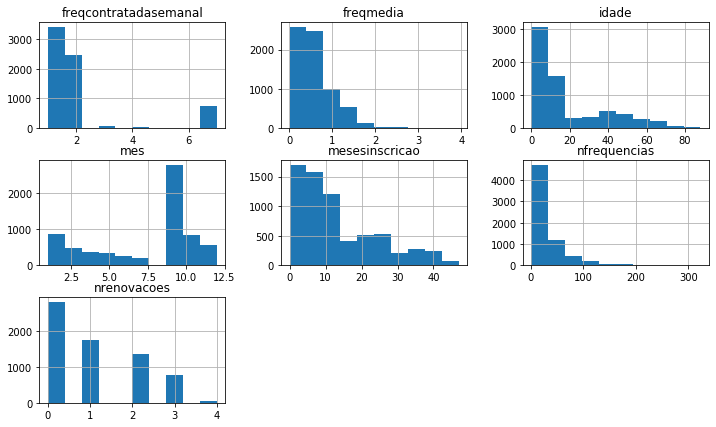

In [91]:
dt[['idade','freqmedia','nfrequencias','freqcontratadasemanal','nrenovacoes','mes','mesesinscricao']].hist();

## age

Utilizar os escalões de idade OMS

| Escalões      | Idades        |
| ------------- |:-------------:|
| Infância      |  até 10 anos  |
| Adolescência  |  10-20        |
| Idade adulta  |  20-40        |
| Meia Idade    |  40-60        |
| Terceira Idade|  +60          |

In [92]:
dt['idade'].describe()

count    6745.000000
mean       18.655300
std        19.292012
min         0.000000
25%         5.000000
50%        10.000000
75%        32.000000
max        88.000000
Name: idade, dtype: float64

In [93]:
dt.columns

Index(['datanasc', 'idade', 'genero', 'inicio', 'termino', 'dtultvisita',
       'diassemfrequencia', 'mesesinscricao', 'volnegocios', 'freqmedia',
       'utilizacao_livre', 'atividade_atletismo', 'atividade_aquaticas',
       'atividade_fitness', 'atividade_danca', 'atividade_coletivos',
       'atividade_raquete', 'atividade_combate', 'atividade_especiais',
       'atividade_natureza', 'atividade_outra', 'natividades', 'nfrequencias',
       'freqcontratadasemanal', 'nrenovacoes', 'nreferencias',
       'classe_desistencia', 'mes'],
      dtype='object')

Vamos dividir a distribuicao idades em 5 partes

In [94]:
#dt['escaloesIdade']=''
#escaloesIdade=[10,20,40,60]
#
#for index, cliente in dt.iterrows():
#    #se a variável tiver o valor 1 colocar na nova variável a descrição da atividade
#    if cliente['idade']<=10:
#        dt.at[index,'escaloesIdade']='ate 10'
#    elif (cliente['idade']>10) & (cliente['idade']<=20):
#        dt.at[index,'escaloesIdade']='10 a 20'
#    elif (cliente['idade']>20) & (cliente['idade']<=40):
#        dt.at[index,'escaloesIdade']='21 a 40'
#    elif (cliente['idade']>40) & (cliente['idade']<=60):
#        dt.at[index,'escaloesIdade']='41 a 60'
#    elif (cliente['idade']>60):
#        dt.at[index,'escaloesIdade']='mais 60'

In [95]:
dt.idade.describe()

count    6745.000000
mean       18.655300
std        19.292012
min         0.000000
25%         5.000000
50%        10.000000
75%        32.000000
max        88.000000
Name: idade, dtype: float64

In [96]:
dt['escaloesIdade']=''
escaloesIdade=[10,20,40,60]

for index, cliente in dt.iterrows():
    #se a variável tiver o valor 1 colocar na nova variável a descrição da atividade
    if cliente['idade']<=5:
        dt.at[index,'escaloesIdade']='until 5'
    elif (cliente['idade']>5) & (cliente['idade']<=10):
        dt.at[index,'escaloesIdade']='5 to 10'
    elif (cliente['idade']>10) & (cliente['idade']<=32):
        dt.at[index,'escaloesIdade']='10 a 32'
    elif (cliente['idade']>32):
        dt.at[index,'escaloesIdade']='more than 32'

In [97]:
dt.escaloesIdade.unique()

array(['10 a 32', '5 to 10', 'until 5', 'more than 32'], dtype=object)

In [98]:
dt.groupby(dt['escaloesIdade']).count().iloc[:,1]

escaloesIdade
10 a 32         1520
5 to 10         1688
more than 32    1666
until 5         1871
Name: idade, dtype: int64

10 a 32  predict survival 12 months: 0.43057257599984217 : median  10.0
5 to 10  predict survival 12 months: 0.6489208673026031 : median  22.0
until 5  predict survival 12 months: 0.5491332303030675 : median  15.0
more than 32  predict survival 12 months: 0.48348093995777114 : median  11.0


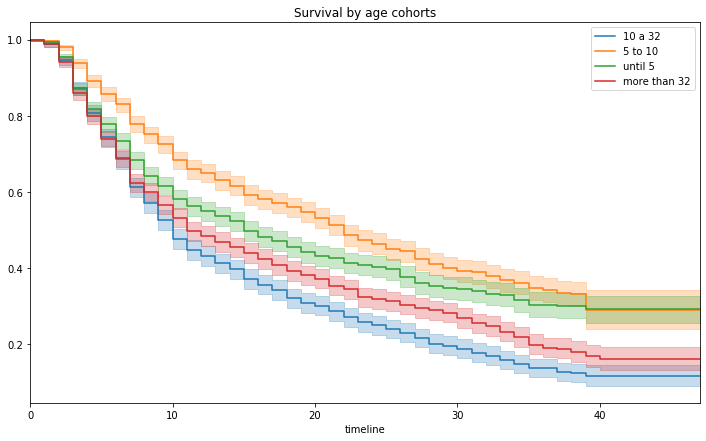

In [104]:
ax = plt.subplot(111)
import matplotlib.pyplot as plt
import numpy as np
#vamos considerar só 0,1,2,3
escaloesIdade=dt['escaloesIdade'].unique()

plt.rcParams['figure.figsize'] = [12, 7]
for escalao in escaloesIdade:
    ix = dt['escaloesIdade'] == escalao
    kmf.fit(T.loc[ix], C.loc[ix], label=str(escalao))
    ax = kmf.plot(ax=ax)
    print(str(escalao),' predict survival 12 months:',kmf.predict(12.0),': median ',kmf.median_)

plt.title('Survival by age cohorts');

In [105]:
from lifelines.statistics import multivariate_logrank_test

results=multivariate_logrank_test(event_durations=T,groups=dt.escaloesIdade,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3

---
 test_statistic      p  -log2(p)
         204.78 <0.005    144.19


In [106]:
from lifelines.statistics import pairwise_logrank_test

results=pairwise_logrank_test(event_durations=T,groups=dt.escaloesIdade,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
                           test_statistic      p  -log2(p)
10 a 32      5 to 10               192.30 <0.005    142.85
             more than 32           13.57 <0.005     12.09
             until 5                67.91 <0.005     52.37
5 to 10      more than 32          101.89 <0.005     77.17
             until 5                26.39 <0.005     21.77
more than 32 until 5                23.63 <0.005     19.71


## maccess

In [107]:
dt.freqmedia.describe()

count    6745.000000
mean        0.600197
std         0.423792
min         0.010000
25%         0.300000
50%         0.510000
75%         0.800000
max         3.940000
Name: freqmedia, dtype: float64

In [108]:
dt['esc_maccess']=''
for index, cliente in dt.iterrows():
    #se a variável tiver o valor 1 colocar na nova variável a descrição da atividade
    if cliente['freqmedia'] <= 0.3:
        dt.at[index,'esc_maccess']='maccess less than 0.3'
    elif (cliente['freqmedia'] > 0.3) & (cliente['freqmedia'] < 0.51):
        dt.at[index,'esc_maccess']='maccess greather than 0.3 and less 0.51'
    elif (cliente['freqmedia'] >= 0.51) & (cliente['freqmedia'] < 0.8):
        dt.at[index,'esc_maccess']='maccess greather than 0.51 and less 0.8'
    elif (cliente['freqmedia'] >= 0.8):
        dt.at[index,'esc_maccess']='maccess greather than 0.8'

In [109]:
dt['esc_maccess'].value_counts()

maccess less than 0.3                      1740
maccess greather than 0.8                  1698
maccess greather than 0.51 and less 0.8    1675
maccess greather than 0.3 and less 0.51    1632
Name: esc_maccess, dtype: int64

In [110]:
dt['esc_maccess'].unique()

array(['maccess greather than 0.51 and less 0.8',
       'maccess greather than 0.3 and less 0.51',
       'maccess greather than 0.8', 'maccess less than 0.3'], dtype=object)

Vamos considerar 3,4 e 5 superior a duas vezes por semana

maccess greather than 0.51 and less 0.8  predict survival 12 months: 0.5979748810760623 : median  20.0
maccess greather than 0.3 and less 0.51  predict survival 12 months: 0.5140966461680566 : median  13.0
maccess greather than 0.8  predict survival 12 months: 0.6244376660357491 : median  21.0
maccess less than 0.3  predict survival 12 months: 0.4056633508325905 : median  9.0


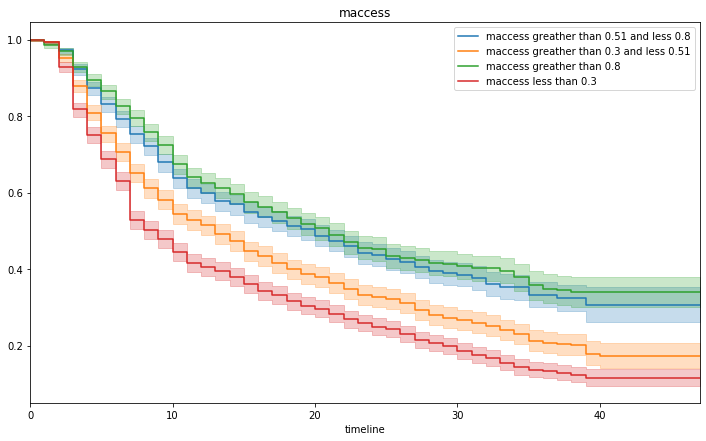

In [111]:
ax = plt.subplot(111)
#vamos considerar só 0,1,2,3
idas=dt['esc_maccess'].unique()

plt.rcParams['figure.figsize'] = [12, 7]
for ida in idas:
    ix = dt['esc_maccess'] == ida
    kmf.fit(T.loc[ix], C.loc[ix], label=str(ida))
    ax = kmf.plot(ax=ax)
    print(str(ida),' predict survival 12 months:',kmf.predict(12.0),': median ',kmf.median_)
plt.title('maccess');

In [112]:
results=multivariate_logrank_test(event_durations=T,groups=dt.esc_maccess,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3

---
 test_statistic      p  -log2(p)
         294.44 <0.005    208.62


In [113]:
results=pairwise_logrank_test(event_durations=T,groups=dt.esc_maccess,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
                                                                                 test_statistic      p  -log2(p)
maccess greather than 0.3 and less 0.51 maccess greather than 0.51 and less 0.8           48.81 <0.005     38.36
                                        maccess greather than 0.8                         70.70 <0.005     54.41
                                        maccess less than 0.3                             40.72 <0.005     32.41
maccess greather than 0.51 and less 0.8 maccess greather than 0.8                          2.46   0.12      3.10
                                        maccess less than 0.3                            179.86 <0.005    133.82
maccess greather than 0.8               maccess less than 0.3                            216.01 <0.005    160.03


O número idas com uma retenção maior é 2 ou mais. A tendência de retenção maior só se apresenta depois dos 10 meses. O abandono depois dos 10 meses é menor nos clientes que vão em média 1 a 2 vezes ou mais. As estratégias devem estar focadas na manutenção do cliente nos primeiros 10 meses e tentar que vão em média pelo menos 1 vez por semana.

## nentries

In [114]:
dt.columns

Index(['datanasc', 'idade', 'genero', 'inicio', 'termino', 'dtultvisita',
       'diassemfrequencia', 'mesesinscricao', 'volnegocios', 'freqmedia',
       'utilizacao_livre', 'atividade_atletismo', 'atividade_aquaticas',
       'atividade_fitness', 'atividade_danca', 'atividade_coletivos',
       'atividade_raquete', 'atividade_combate', 'atividade_especiais',
       'atividade_natureza', 'atividade_outra', 'natividades', 'nfrequencias',
       'freqcontratadasemanal', 'nrenovacoes', 'nreferencias',
       'classe_desistencia', 'mes', 'escaloesIdade', 'esc_maccess'],
      dtype='object')

In [115]:
dt.nfrequencias.describe()

count    6745.000000
mean       29.835434
std        35.394236
min         1.000000
25%         6.000000
50%        17.000000
75%        40.000000
max       323.000000
Name: nfrequencias, dtype: float64

In [116]:
dt['esc_entries']=''
for index, cliente in dt.iterrows():
    #se a variável tiver o valor 1 colocar na nova variável a descrição da atividade
    if cliente['nfrequencias'] <= 6:
        dt.at[index,'esc_entries']='until 6'
    elif (cliente['nfrequencias'] > 6) & (cliente['nfrequencias'] < 17):
        dt.at[index,'esc_entries']='6 to 17'
    elif (cliente['nfrequencias'] >= 17) & (cliente['nfrequencias'] < 40):
        dt.at[index,'esc_entries']='17 to 40'
    elif (cliente['nfrequencias'] >= 40):
        dt.at[index,'esc_entries']='more than 40'
       
    #dt.at[index,'idas']=np.around(cliente['nfrequencias'],decimals=1)

In [117]:
dt['esc_entries'].value_counts()

until 6         1720
more than 40    1718
17 to 40        1665
6 to 17         1642
Name: esc_entries, dtype: int64

In [118]:
dt['esc_entries'].unique()

array(['until 6', '17 to 40', '6 to 17', 'more than 40'], dtype=object)

Vamos considerar 3,4 e 5 superior a duas vezes por semana

until 6  predict survival 12 months: 0.12141345870340657 : median  4.0
17 to 40  predict survival 12 months: 0.6370290037312688 : median  17.0
6 to 17  predict survival 12 months: 0.2852619553840528 : median  7.0
more than 40  predict survival 12 months: 0.9186106530361037 : median  39.0


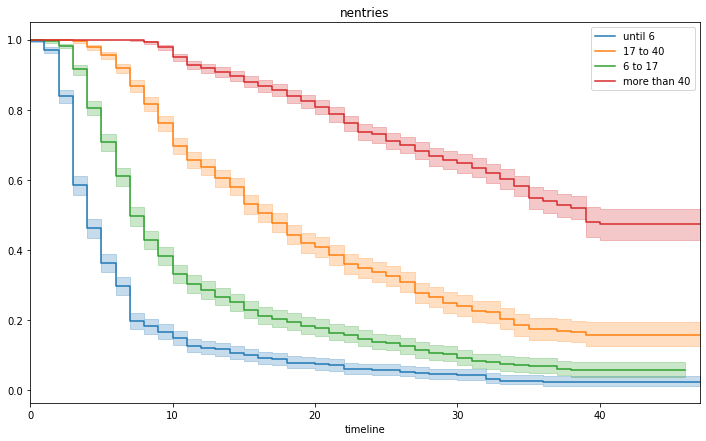

In [119]:
ax = plt.subplot(111)
#vamos considerar só 0,1,2,3
idas=dt['esc_entries'].unique()

plt.rcParams['figure.figsize'] = [12, 7]
for ida in idas:
    ix = dt['esc_entries'] == ida
    kmf.fit(T.loc[ix], C.loc[ix], label=str(ida))
    ax = kmf.plot(ax=ax)
    print(str(ida),' predict survival 12 months:',kmf.predict(12.0),': median ',kmf.median_)
plt.title('nentries');

In [120]:
results=multivariate_logrank_test(event_durations=T,groups=dt.esc_entries,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3

---
 test_statistic      p  -log2(p)
        3721.13 <0.005       inf


In [121]:
results=pairwise_logrank_test(event_durations=T,groups=dt.esc_entries,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
                           test_statistic      p  -log2(p)
17 to 40     6 to 17               429.84 <0.005    314.77
             more than 40          625.76 <0.005    456.37
             until 6              1315.64 <0.005    954.54
6 to 17      more than 40         1706.42 <0.005       inf
             until 6               318.29 <0.005    234.09
more than 40 until 6              2582.34 <0.005       inf


O número idas com uma retenção maior é 2 ou mais. A tendência de retenção maior só se apresenta depois dos 10 meses. O abandono depois dos 10 meses é menor nos clientes que vão em média 1 a 2 vezes ou mais. As estratégias devem estar focadas na manutenção do cliente nos primeiros 10 meses e tentar que vão em média pelo menos 1 vez por semana.

## cfreq

In [122]:
dt.freqcontratadasemanal.describe()

count    6745.000000
mean        2.072350
std         1.823901
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: freqcontratadasemanal, dtype: float64

In [123]:
dt.freqcontratadasemanal.unique()

array([1., 2., 7., 3., 4., 6.])

In [124]:
dt.freqcontratadasemanal.value_counts()

1.0    3410
2.0    2485
7.0     755
3.0      69
4.0      25
6.0       1
Name: freqcontratadasemanal, dtype: int64

Considerando a distribuicao foram divididos em 1,2 e 3+

In [125]:
dt['esc_cfreq']=''

for index, cliente in dt.iterrows():
    #se a variável tiver o valor 1 colocar na nova variável a descrição da atividade
    if cliente['freqcontratadasemanal']<=1:
        dt.at[index,'esc_cfreq']='cfreq 1'
    elif cliente['freqcontratadasemanal']==2:
        dt.at[index,'esc_cfreq']='cfreq 2'
    elif cliente['freqcontratadasemanal']>=3:
        dt.at[index,'esc_cfreq']='cfreq 3'


In [126]:
dt.esc_cfreq.value_counts()

cfreq 1    3410
cfreq 2    2485
cfreq 3     850
Name: esc_cfreq, dtype: int64

cfreq 1  predict survival 12 months: 0.5377226135134687 : median  15.0
cfreq 2  predict survival 12 months: 0.483370910687046 : median  11.0
cfreq 3  predict survival 12 months: 0.6283866126401795 : median  21.0


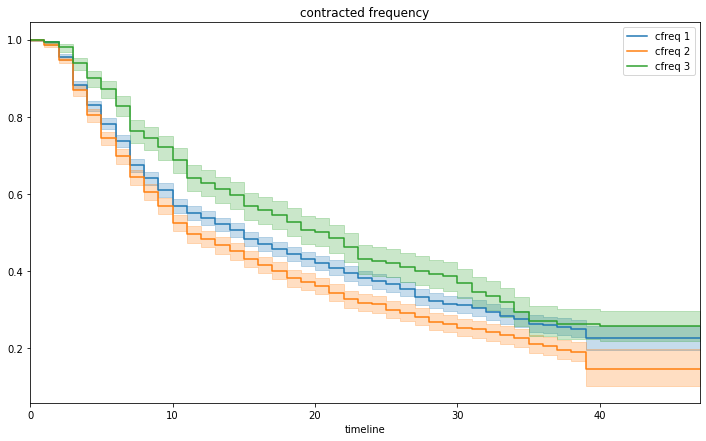

In [127]:
ax = plt.subplot(111)
cfreqs=dt.esc_cfreq.unique()

plt.rcParams['figure.figsize'] = [12, 7]
for cfreq in cfreqs:
    ix = dt['esc_cfreq'] == cfreq
    kmf.fit(T.loc[ix], C.loc[ix],label=str(cfreq))
    ax = kmf.plot(ax=ax)
    print(str(cfreq),' predict survival 12 months:',kmf.predict(12.0),': median ',kmf.median_)
plt.title('contracted frequency')
T.loc;

Contratar 3 ou mais frequências a sobrevivência é maior. Contratar 2 é menor do que contratar só uma frequência. Existem várias questões como a habituação à prática desportiva e quem tem a intenção de ir 3 ou mais vezes tem uma maior motivação.

Podemos abordar a intenção para a prática desportiva ser maior e a retenção também ser maior.

In [128]:
results=multivariate_logrank_test(event_durations=T,groups=dt.esc_cfreq,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2

---
 test_statistic      p  -log2(p)
          53.33 <0.005     38.47


Existem diferenças nas curvas de sobrevivência

In [129]:
results=pairwise_logrank_test(event_durations=T,groups=dt.esc_cfreq,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
                 test_statistic      p  -log2(p)
cfreq 1 cfreq 2           21.57 <0.005     18.16
        cfreq 3           15.44 <0.005     13.52
cfreq 2 cfreq 3           50.15 <0.005     39.36


Existem diferenças entre todas as curvas de sobrevivência

## nrenewals

In [130]:
dt.nrenovacoes.describe()

count    6745.000000
mean        1.038992
std         1.069552
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: nrenovacoes, dtype: float64

In [131]:
dt.nrenovacoes.unique()

array([0, 1, 2, 4, 3], dtype=int64)

In [132]:
dt.nrenovacoes.value_counts()

0    2803
1    1752
2    1366
3     772
4      52
Name: nrenovacoes, dtype: int64

In [133]:
dt['esc_nrenewals'] = 0

In [134]:
dt['esc_nrenewals']=''

for index, cliente in dt.iterrows():
    #se a variável tiver o valor 1 colocar na nova variável a descrição da atividade
    if cliente['nrenovacoes'] == 0:
        dt.at[index,'esc_nrenewals']='renewals 0'
    elif cliente['nrenovacoes'] == 1:
        dt.at[index,'esc_nrenewals']='renewals 1'
    elif cliente['nrenovacoes'] == 2:
        dt.at[index,'esc_nrenewals']='renewals 2'
    elif cliente['nrenovacoes']>2:
        dt.at[index,'esc_nrenewals']='renewals 2+'

In [135]:
dt.esc_nrenewals.value_counts()

renewals 0     2803
renewals 1     1752
renewals 2     1366
renewals 2+     824
Name: esc_nrenewals, dtype: int64

In [136]:
dt.esc_nrenewals.unique()

array(['renewals 0', 'renewals 1', 'renewals 2', 'renewals 2+'],
      dtype=object)

renewals 0  predict survival 12 months: 0.019021929079282563 : median  5.0
renewals 1  predict survival 12 months: 0.6987873619361521 : median  16.0
renewals 2  predict survival 12 months: 0.8549310063701384 : median  27.0
renewals 2+  predict survival 12 months: 0.9991909385113266 : median  inf


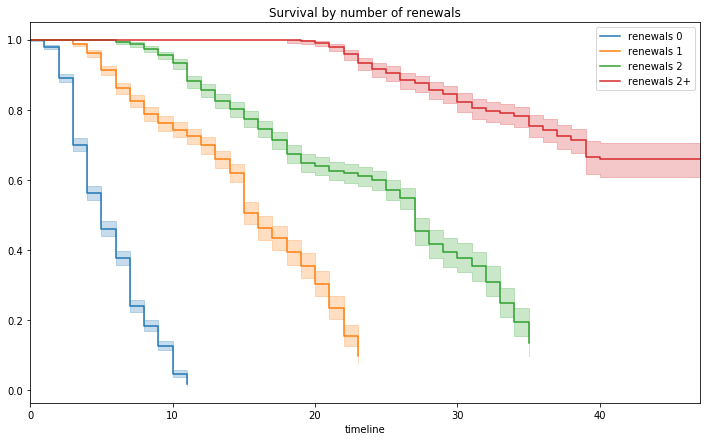

In [138]:
ax = plt.subplot(111)
nrenewals=dt.esc_nrenewals.unique()

for nrenewal in nrenewals:
    ix = dt['esc_nrenewals'] == nrenewal
    kmf.fit(T.loc[ix], C.loc[ix],label=str(nrenewal))
    ax = kmf.plot(ax=ax)
    print(str(nrenewal),' predict survival 12 months:',kmf.predict(12.0),': median ',kmf.median_)
plt.title('Survival by number of renewals')
T.loc;

In [139]:
results=multivariate_logrank_test(event_durations=T,groups=dt.esc_nrenewals,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3

---
 test_statistic      p  -log2(p)
        6264.73 <0.005       inf


Existem diferenças nas curvas de sobrevivência

In [140]:
results=pairwise_logrank_test(event_durations=T,groups=dt.nrenovacoes,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
     test_statistic      p  -log2(p)
0 1         2310.12 <0.005       inf
  2         2991.50 <0.005       inf
  3         2085.62 <0.005       inf
  4          220.46 <0.005    163.26
1 2          414.49 <0.005    303.67
  3         1016.39 <0.005    738.49
  4          117.55 <0.005     88.57
2 3          463.07 <0.005    338.79
  4           73.02 <0.005     56.11
3 4            0.83   0.36      1.46


Existem diferenças entre todas as curvas de sobrevivência

## imonth

In [141]:
dt['mes'].unique()

array([ 9, 10,  6,  7,  2, 12,  4,  3,  1,  5, 11,  8], dtype=int64)

In [142]:
dt.mes.describe()

count    6745.000000
mean        7.251001
std         3.173279
min         1.000000
25%         4.000000
50%         9.000000
75%         9.000000
max        12.000000
Name: mes, dtype: float64

In [143]:
dt['mes'].value_counts()

9     2794
10     830
3      487
2      450
1      420
11     403
4      383
5      339
6      264
7      203
12     160
8       12
Name: mes, dtype: int64

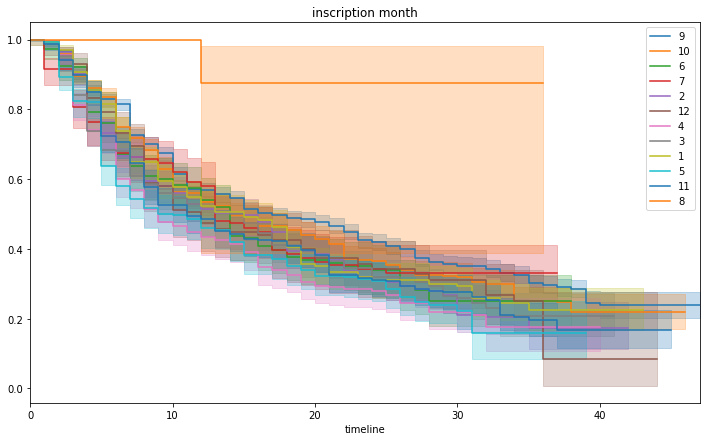

In [144]:
ax = plt.subplot(111)
import matplotlib.pyplot as plt
import numpy as np
#vamos considerar só 0,1,2,3
meses=dt['mes'].unique()

plt.rcParams['figure.figsize'] = [12, 7]
for mes in meses:
    ix = dt['mes'] == mes
    kmf.fit(T.loc[ix], C.loc[ix], label=str(mes))
    ax = kmf.plot(ax=ax)
plt.title('inscription month');

O gráfico fica muito confuso vamos agrupar por trimestre

In [145]:
results=multivariate_logrank_test(event_durations=T,groups=dt.mes,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 11

---
 test_statistic      p  -log2(p)
         106.29 <0.005     56.47


In [146]:
results=pairwise_logrank_test(event_durations=T,groups=dt.mes,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
       test_statistic      p  -log2(p)
1  2             0.69   0.40      1.30
   3             1.23   0.27      1.91
   4             8.44 <0.005      8.09
   5             8.39 <0.005      8.05
   6             1.26   0.26      1.93
   7             0.10   0.76      0.40
   8             5.23   0.02      5.49
   9            10.36 <0.005      9.60
   10            0.85   0.36      1.48
   11            1.10   0.29      1.77
   12            0.05   0.83      0.27
2  3             0.08   0.78      0.37
   4             5.35   0.02      5.60
   5             2.91   0.09      3.50
   6             0.12   0.73      0.45
   7             0.03   0.87      0.20
   8             5.59   0.02      5.79
   9            20.52 <0.005     17.37
   10            5.35   0.02      5.59
   11            0.10   0.75      0.41
   12            0.27   0.61      0.72
3  4             4.09   0.0

In [147]:
T = dt["mesesinscricao"]
E = dt["classe_desistencia"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 6745 observations, 2850 censored>

In [148]:
### vamos calcular por trimestres
dt.loc[dt['mes'].isin([1,2,3]),'trimestre']='Jan, Fev and Mar'
dt.loc[dt['mes'].isin([4,5,6]),'trimestre']='Apr, May, Jun'
dt.loc[dt['mes'].isin([7,8,9]),'trimestre']='Jul, Aug, Set'
dt.loc[dt['mes'].isin([10,11,12]),'trimestre']='Oct, Nov, Dez'

In [149]:
dt.trimestre.value_counts()

Jul, Aug, Set       3009
Oct, Nov, Dez       1393
Jan, Fev and Mar    1357
Apr, May, Jun        986
Name: trimestre, dtype: int64

In [150]:
dt['trimestre'].unique()

array(['Jul, Aug, Set', 'Oct, Nov, Dez', 'Apr, May, Jun',
       'Jan, Fev and Mar'], dtype=object)

Jul, Aug, Set  predict survival 12 months: 0.5702275005654139 : median  16.0
Oct, Nov, Dez  predict survival 12 months: 0.5128328829165126 : median  13.0
Apr, May, Jun  predict survival 12 months: 0.47059328513462945 : median  11.0
Jan, Fev and Mar  predict survival 12 months: 0.5195161809660498 : median  15.0


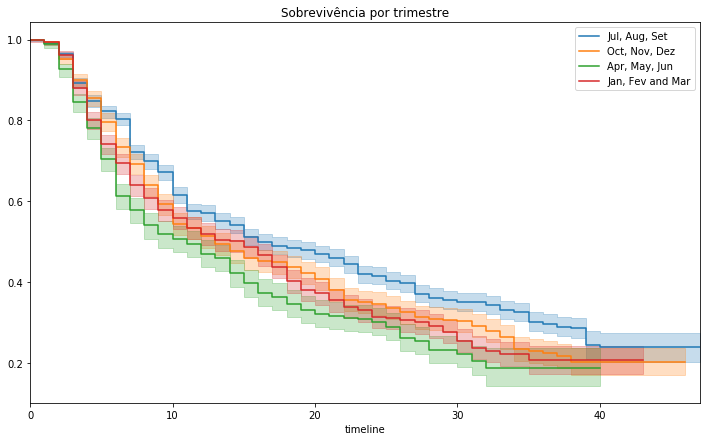

In [152]:
ax = plt.subplot(111)
#vamos considerar só 0,1,2,3
trimestres=dt['trimestre'].unique()

plt.rcParams['figure.figsize'] = [12, 7]
for trimestre in trimestres:
    ix = dt['trimestre'] == trimestre
    kmf.fit(T.loc[ix], C.loc[ix], label=str(trimestre))
    ax = kmf.plot(ax=ax)
    print(str(trimestre),' predict survival 12 months:',kmf.predict(12.0),': median ',kmf.median_)

plt.title('Sobrevivência por trimestre');

A sobrevivência por trimestre varia. O trimestre julho, agosto e setembro tem uma sobrevivência maior. Quem começa depois do verão ou inicio do ano apresenta uma curva de sobrevivência menor.

Existem diferenças nas curvas de sobrevivência

In [153]:
results=multivariate_logrank_test(event_durations=T,groups=dt.trimestre,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3

---
 test_statistic      p  -log2(p)
          86.33 <0.005     59.37


In [154]:
results=pairwise_logrank_test(event_durations=T,groups=dt.trimestre,event_observed=C)
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
                                   test_statistic      p  -log2(p)
Apr, May, Jun    Jan, Fev and Mar            9.13 <0.005      8.63
                 Jul, Aug, Set              74.08 <0.005     56.89
                 Oct, Nov, Dez              19.80 <0.005     16.82
Jan, Fev and Mar Jul, Aug, Set              34.11 <0.005     27.52
                 Oct, Nov, Dez               2.17   0.14      2.83
Jul, Aug, Set    Oct, Nov, Dez              19.83 <0.005     16.85


Existem diferenças entre todas as curvas de sobrevivência

# Resultados

## Log rank test:
The null hypothesis is that the hazard rates of all populations are equal at all times less than the maximum observed time and the alternative hypothesis is that at least two of the hazard rates are different at some time less than the observed maximum time.
O risco de abandono ao longo do tempo é diferente nos homens e mulheres (p menor 0.001)

H0: a curva de sobrevivência é igual nos homens e mulheres

H1: a curva de sobrevivência é diferente nos homens e mulheres

## age

## maccess

## cfreq

## nrenewals

## imonth

# Gravar dados

In [155]:
dt.columns

Index(['datanasc', 'idade', 'genero', 'inicio', 'termino', 'dtultvisita',
       'diassemfrequencia', 'mesesinscricao', 'volnegocios', 'freqmedia',
       'utilizacao_livre', 'atividade_atletismo', 'atividade_aquaticas',
       'atividade_fitness', 'atividade_danca', 'atividade_coletivos',
       'atividade_raquete', 'atividade_combate', 'atividade_especiais',
       'atividade_natureza', 'atividade_outra', 'natividades', 'nfrequencias',
       'freqcontratadasemanal', 'nrenovacoes', 'nreferencias',
       'classe_desistencia', 'mes', 'escaloesIdade', 'esc_maccess',
       'esc_entries', 'esc_cfreq', 'esc_nrenewals', 'trimestre'],
      dtype='object')

In [156]:
dt.to_excel('../dados/dadosArtigoNadadoresAlmada.xlsx',index=True)